<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/ADROIT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **1) Import Libraries**

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance
from sklearn.naive_bayes import GaussianNB

#### **2) Import Data And Preprocessing**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Android = pd.read_csv("/content/drive/MyDrive/TMLC/Android.zip")

In [5]:
display(Android.head(3))
display(Android.tail(3))

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.0,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.0,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fort

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.0,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.0,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29998,Brain Ball 

In [6]:
Android.shape

(29999, 184)

In [7]:
train_original = Android.copy()

In [8]:
Android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Columns: 184 entries, App to Class
dtypes: float64(3), int64(176), object(5)
memory usage: 42.1+ MB


In [9]:
Android.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29999.000000,2.999900e+04,29999.000000,29795.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.0,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,...,

#### **3) Exploratory Data Analysis**

#### **3.1) Data Preprocessing**

##### **a) App**

In [10]:
Android['App'].nunique()

22823

In [11]:
Android['App'].value_counts()

Tic Tac Toe                  47
????????????                 25
Slot Machine                 16
??????????????????           15
Solitaire                    14
                             ..
Eastern Bank                  1
Critter Rollers               1
Flurry Pro Live Wallpaper     1
Online Payroll                1
Las Vegas Don'ts              1
Name: App, Length: 22823, dtype: int64

In [12]:
print(Android['App'].where(Android['App'] == '?'))

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
29994    NaN
29995    NaN
29996    NaN
29997    NaN
29998    NaN
Name: App, Length: 29999, dtype: object


In [13]:
# substring to be searched
sub ='?'
 
# creating and passing series to new column
df = Android['App'].str.find(sub)
 
# display
df

0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
        ... 
29994   -1.0
29995   -1.0
29996   -1.0
29997   -1.0
29998   -1.0
Name: App, Length: 29999, dtype: float64

##### **b) Package**

In [14]:
Android['Package'].nunique()

23485

##### **c) Category**

In [15]:
Android['Category'].nunique()

30

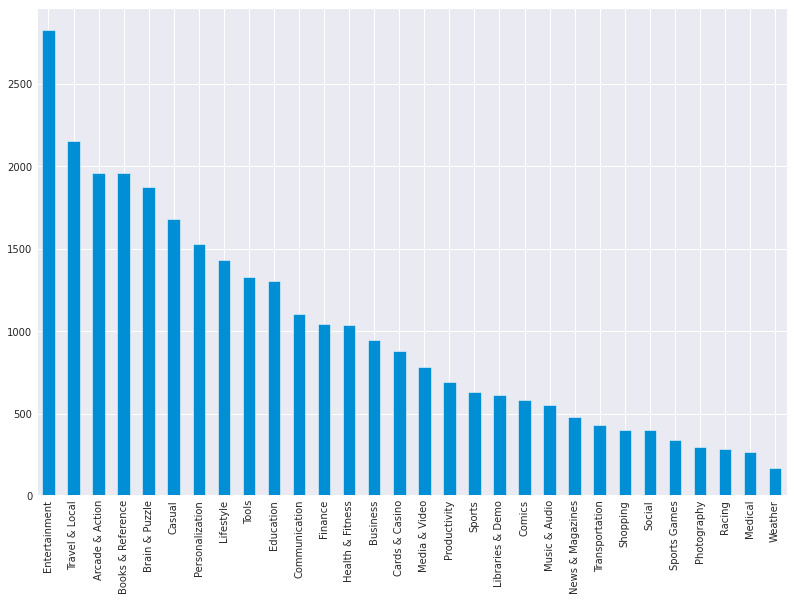

In [16]:
plt.figure(figsize=(12,9))
Android['Category'].value_counts().plot(kind='bar')
plt.show()

##### **d) Description**

In [17]:
Android['Description'].nunique()

23552

In [44]:
Android['Description'].value_counts()

Phrasebook and Translator contains all the essential travel words and phrases you will need, more than 250 phrases and words which will help you on your trip. All of content is downloaded onto your device so you do not need internet connection to use this app. In addition to the phrasebook, this app includes a full Translator which you can use with internet or data connection, translating over a million words and phrases. Use the search feature to quickly find the phrase you need, or browse one of the nine categories. The categories are Public Transportation, Common Phrases, Shopping, Restaurants, Numbers and Money, Emergencies, Hotels, Dates and Times, Asking for Directions, and Other. Rated one of the top phrasebook apps. A must have application for your trip.                                                                                                                                                                                                                                    

##### **e) Rating**

In [73]:
Android['Rating'].nunique()

42

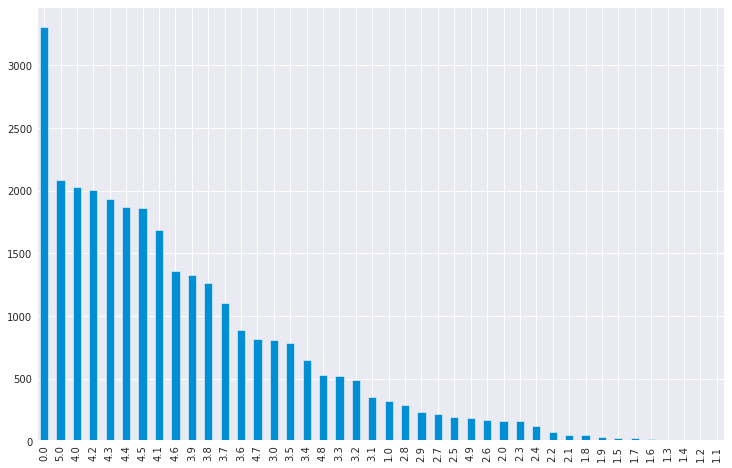

In [77]:
plt.figure(figsize=(11,8))
Android['Rating'].value_counts().plot(kind='bar');

##### **f) Number of ratings**

In [74]:
Android['Number of ratings'].nunique()

5312

##### **g) Price**

In [78]:
Android['Price'].nunique()

425

In [98]:
Android['Price'].value_counts()

0.00     24322
0.99      1690
1.99       609
2.99       414
4.99       215
         ...  
49.95        1
4.32         1
51.00        1
2.42         1
3.96         1
Name: Price, Length: 425, dtype: int64

No of Paid Apps:
 1    5677
Name: Class, dtype: int64


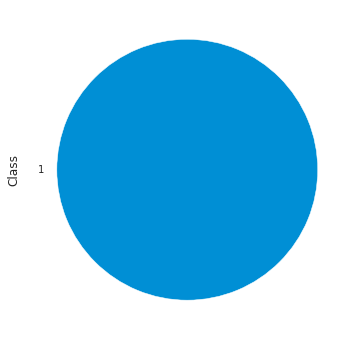

In [110]:
# Paid App's
Android[Android['Price'] !=0].Class.value_counts().plot(kind='pie', figsize=(7,6));
print("No of Paid Apps:\n", Android[Android['Price'] !=0].Class.value_counts())

- In **Paid App's** all are **malware**

No of Free Apps:
 1    14323
0     9999
Name: Class, dtype: int64


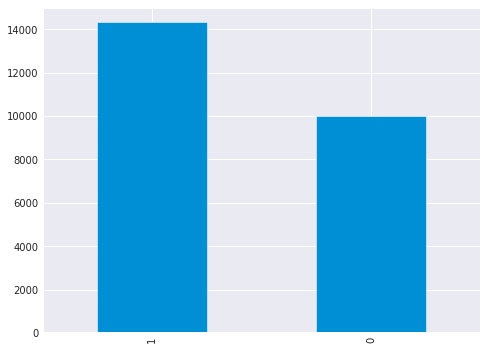

In [111]:
# free App's
Android[Android['Price'] == 0].Class.value_counts().plot(kind='bar', figsize=(7,6));
print("No of Free Apps:\n", Android[Android['Price'] ==0].Class.value_counts())

- In **Free App's**

  - **malware : 14323**
  - **Benign : 9999**


##### **h) Related apps**

In [18]:
Android['Related apps'].nunique()

23868

##### **i) Dangerous permissions count**

In [19]:
Android['Dangerous permissions count'].nunique()

28

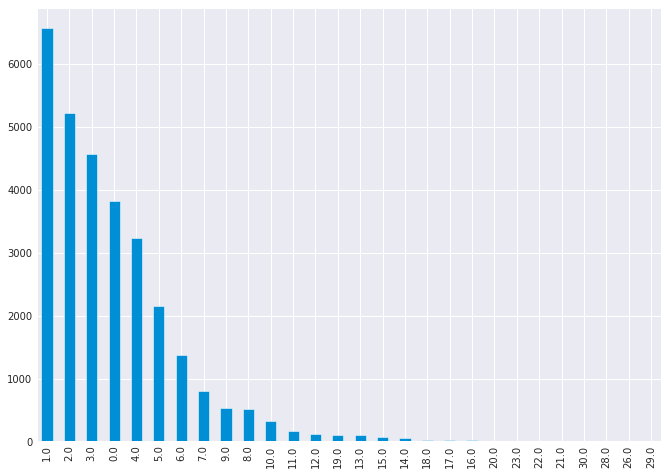

In [51]:
plt.figure(figsize=(10,8))
Android['Dangerous permissions count'].value_counts().plot(kind='bar');

##### **j) Safe permissions count**

In [20]:
Android['Safe permissions count'].nunique()

16

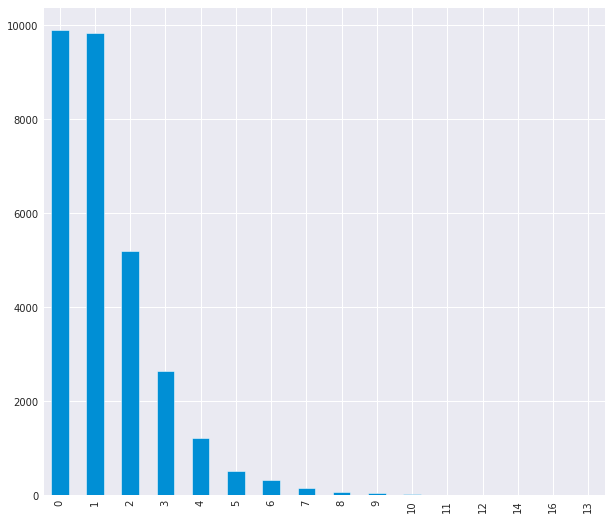

In [54]:
plt.figure(figsize=(9,9))
Android['Safe permissions count'].value_counts().plot(kind='bar');

#### **3.2) Visualizations**

##### **3.2.1) Univariate Analysis**

Number of unique values in each class:

 1    20000
0     9999
Name: Class, dtype: int64


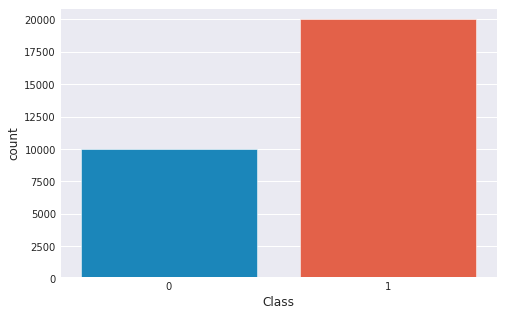

In [21]:
print("Number of unique values in each class:\n\n", Android['Class'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(data=Android, x='Class')
plt.show()

In [22]:
obs=len(Android)
mal= len(Android.loc[Android['Class'] == 1])
not_mal= len(Android.loc[Android['Class'] == 0])
print('Percentages of malware and benign applications in original dataset:')
print('Num of Malware: {0} ({1:.2f}%)'.format(mal, (mal/obs)*100))
print('Num of benign: {0} ({1:.2f}%)'.format(not_mal, (not_mal/obs)*100))

Percentages of malware and benign applications in original dataset:
Num of Malware: 20000 (66.67%)
Num of benign: 9999 (33.33%)


##### **3.2.2) Bivariate Analysis --> plotting two variables)**

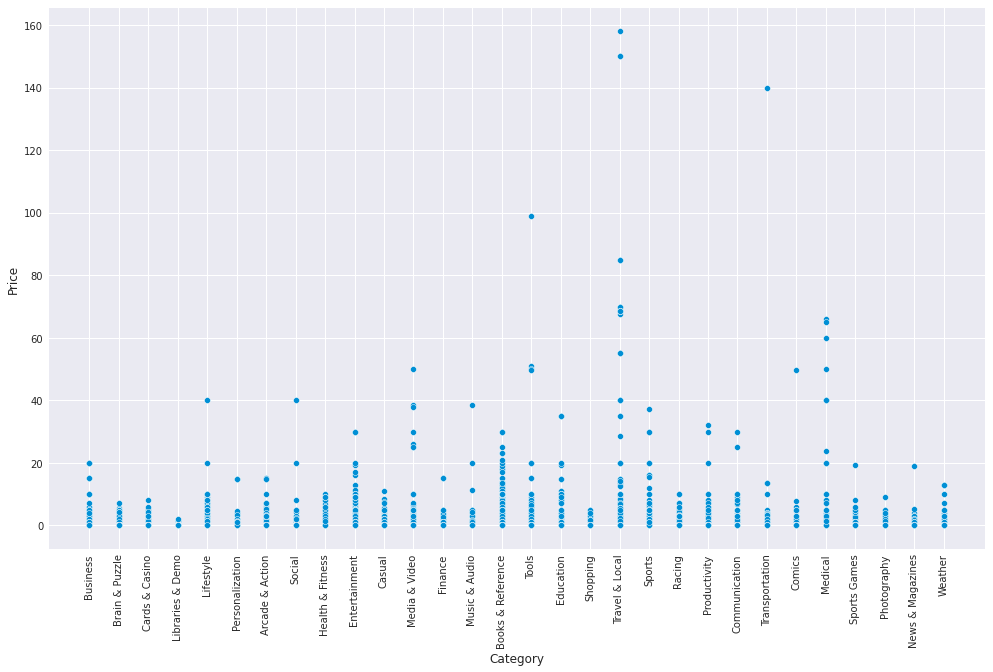

In [23]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Category', y='Price', data=Android)
plt.xticks(rotation=90)
plt.show()

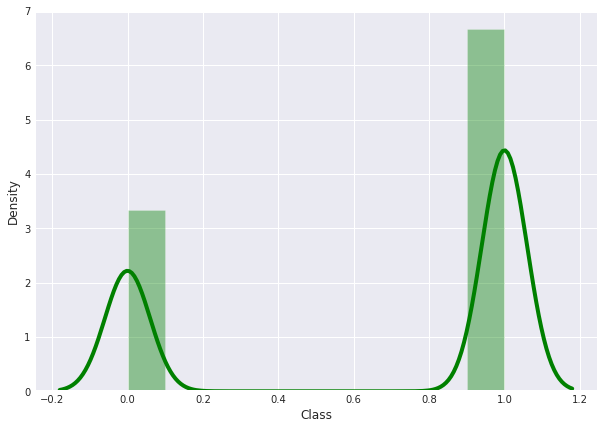

In [24]:
plt.figure(figsize=(9,7))
sns.distplot(Android['Class'], color='g', bins=10, hist_kws={'alpha':0.4});

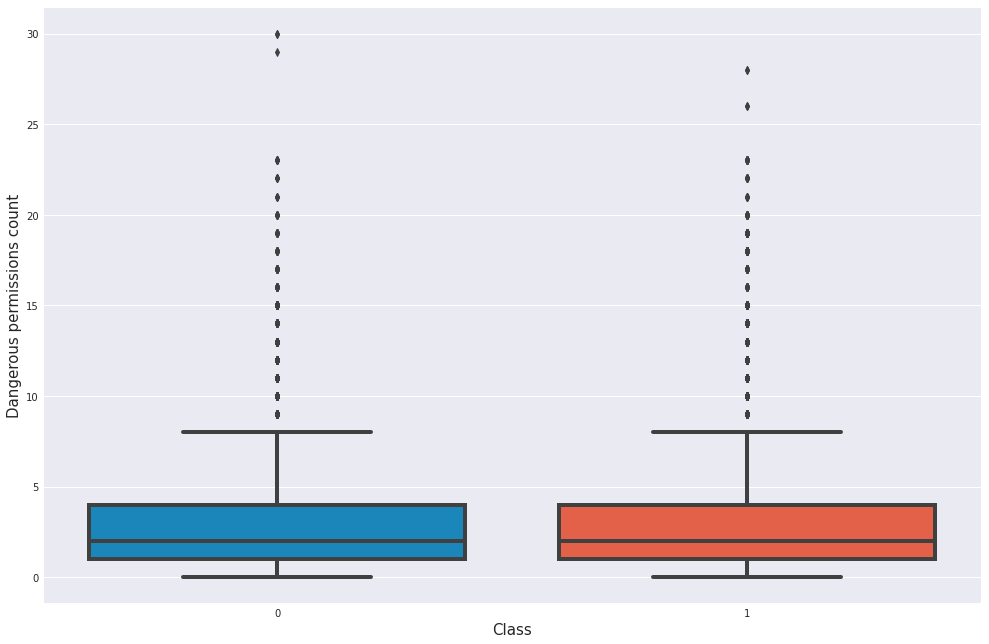

In [68]:
plt.figure(figsize=(15,11))
sns.boxplot(data=Android, x='Class', y=Android['Dangerous permissions count'][Android.Class==0])
sns.boxplot(data=Android, x='Class', y=Android['Dangerous permissions count'][Android.Class==1])
plt.xlabel("Class", size=15)
plt.ylabel("Dangerous permissions count", size=15)
plt.show()

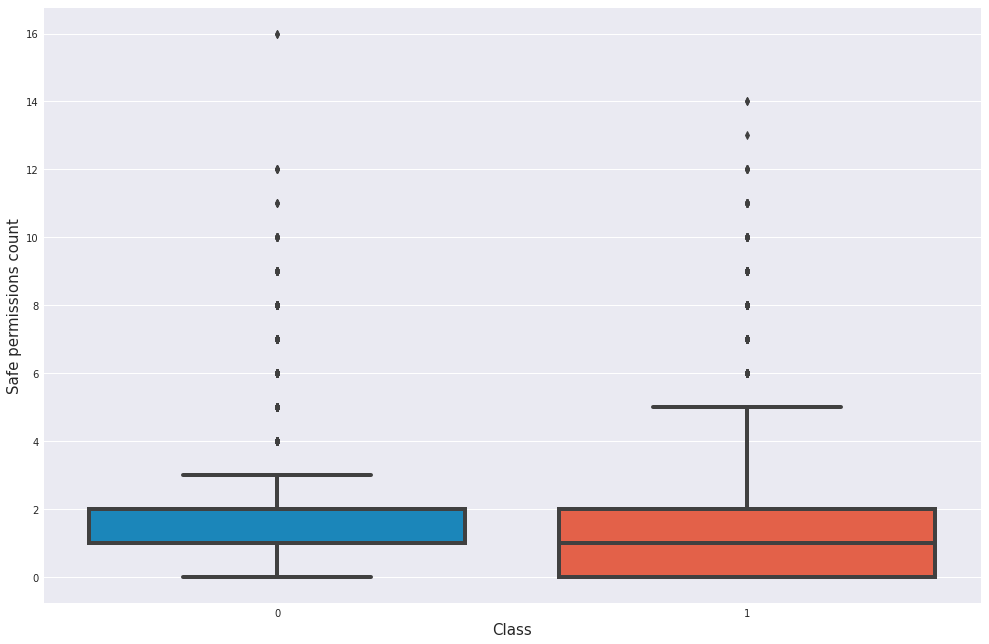

In [70]:
plt.figure(figsize=(15,11))
sns.boxplot(data=Android, x='Class', y=Android['Safe permissions count'][Android.Class==0])
sns.boxplot(data=Android, x='Class', y=Android['Safe permissions count'][Android.Class==1])
plt.xlabel("Class", size=15)
plt.ylabel("Safe permissions count", size=15)
plt.show()

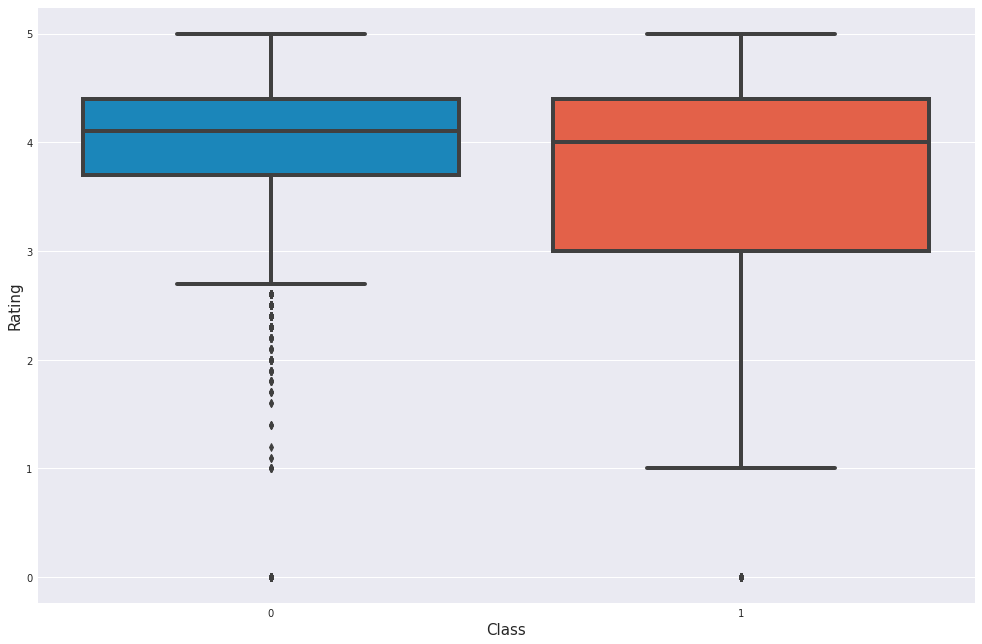

In [79]:
plt.figure(figsize=(15,11))
sns.boxplot(data=Android, x='Class', y=Android['Rating'][Android.Class==0])
sns.boxplot(data=Android, x='Class', y=Android['Rating'][Android.Class==1])
plt.xlabel("Class", size=15)
plt.ylabel("Rating", size=15)
plt.show()

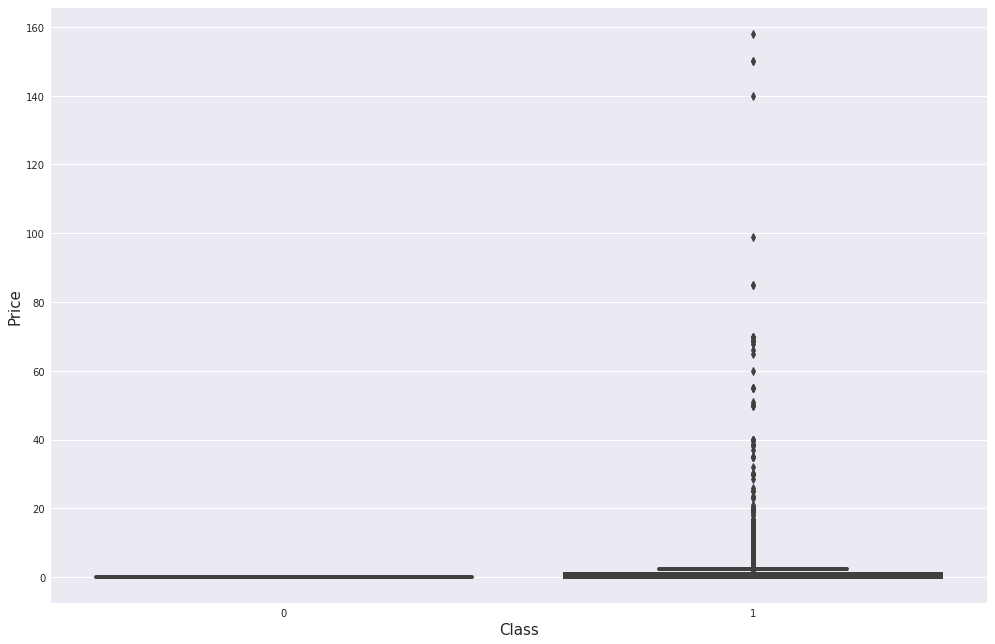

In [88]:
plt.figure(figsize=(15,11))
sns.boxplot(data=Android, x='Class', y=Android['Price'][Android.Class==0])
sns.boxplot(data=Android, x='Class', y=Android['Price'][Android.Class==1])
plt.xlabel("Class", size=15)
plt.ylabel("Price", size=15)
plt.show()

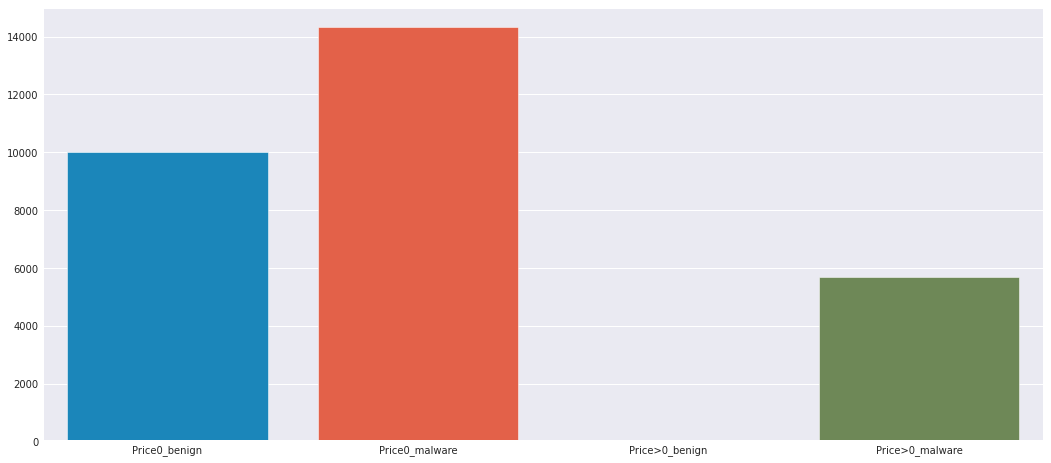

In [90]:
d = {'Price0_benign': [len(Android[(Android['Price']==0) & (Android['Class']==0)])], 
     'Price0_malware': [len(Android[(Android['Price']==0) & (Android['Class']==1)])],
     'Price>0_benign': [len(Android[(Android['Price']>0) & (Android['Class']==0)])],
     'Price>0_malware': [len(Android[(Android['Price']>0) & (Android['Class']==1)])]}

price_cls = pd.DataFrame(data=d)
plt.figure(figsize=(16,8))
sns.barplot(data=price_cls);

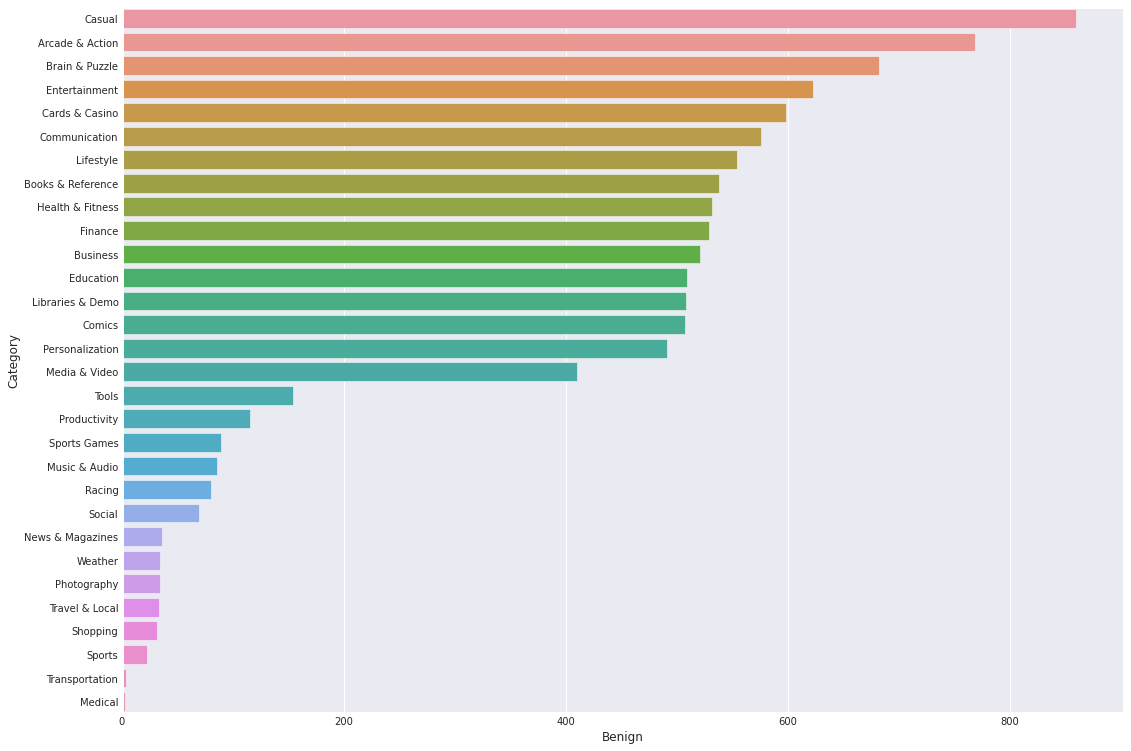

In [92]:
benign = Android.groupby('Category')['Class'].apply(lambda x: (x==0).sum()).reset_index(name='Benign').sort_values('Benign', ascending=False)

plt.figure(figsize=(16,13))
sns.barplot(y="Category", x="Benign", data=benign);

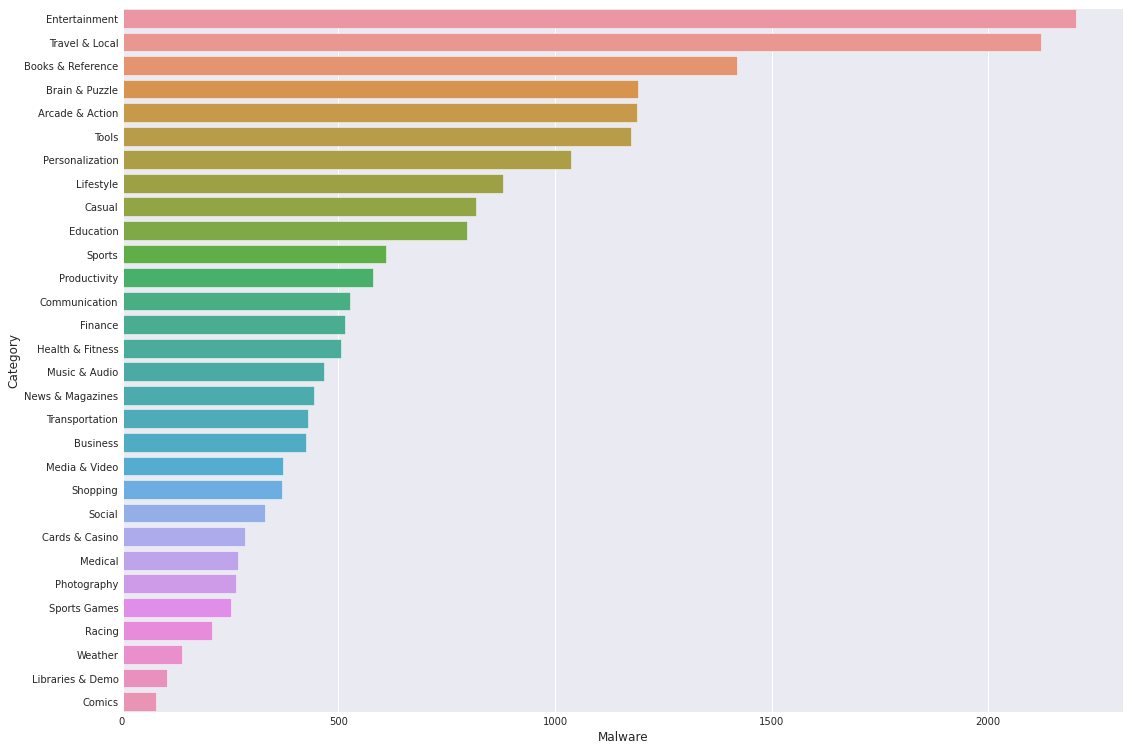

In [94]:
malware = Android.groupby('Category')['Class'].apply(lambda x: (x==1).sum()).reset_index(name='Malware').sort_values('Malware', ascending=False)

plt.figure(figsize=(16,13))
sns.barplot(y="Category", x="Malware", data=malware);

In [96]:
# Package with most benign
Android.groupby('Package')['Class'].apply(lambda x: (x==0).sum()).reset_index(name='Benign').sort_values('Benign', ascending=False).head(20)

,Package,Benign
9953,com.kiwifruitmobile.sudoku,4
17715,com.wordsmobile.slot,4
12397,com.mw.rouletteroyale,4
6198,com.doodle.candytoss,4
9952,com.kiwifruitmobile.solitaire,4
7223,com.finddifferences.finddifferences,4
2895,com.apostek.SlotMachine,4
6200,com.doodle.restaurant,4
3895,com.bayview.tapfish,4
7514,com.fruits.games,4


In [97]:
# Package with most malware
Android.groupby('Package')['Class'].apply(lambda x: (x==1).sum()).reset_index(name='Malware').sort_values('Malware', ascending=False).head(20)

,Package,Malware
15011,com.shazam.android,8
17438,com.vznavigator.Droid2Global,7
13827,com.poynt.android,7
8033,com.glu.android.skob2_free,7
3660,com.audioguidia.worldexplorer360en,7
8153,com.google.earth,7
17425,com.vznavigator.ADR6300,7
5123,com.com2us.thirdblade.normal.freefull.google.g...,6
9028,com.infonow.bofa,6
17109,com.usefull.phrasestranslate,6


#### **3.2.3) Multivariate Analysis**

In [25]:
features = ['Rating', 'Number of ratings', 'Price', 'Dangerous permissions count', 'Safe permissions count', 'Class']
Correlation = pd.DataFrame(Android, columns=features)

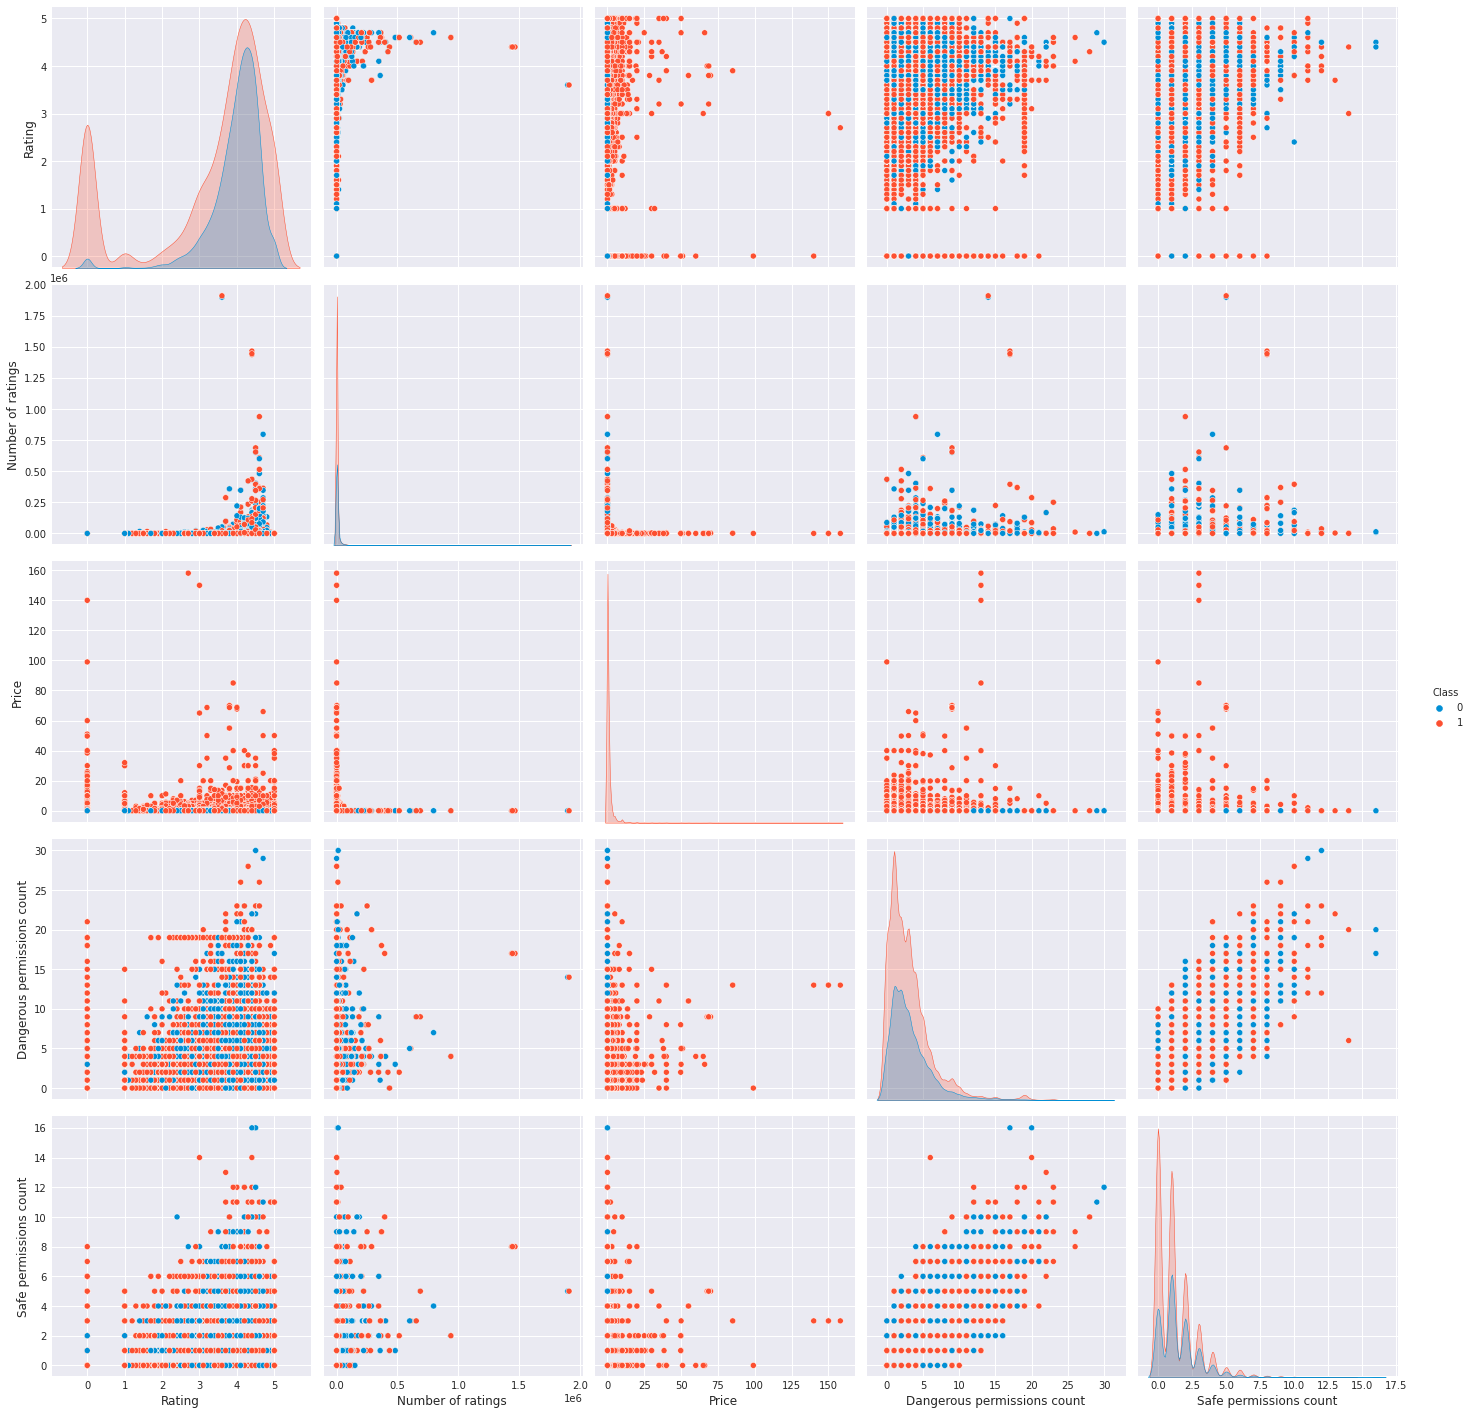

In [26]:
sns.pairplot(Correlation, hue='Class', height=4);

##### **Numerical Features**

In [27]:
df_num = Android.select_dtypes(include=['int64', 'float64'])
df_num.head()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,3.1,77,0.00,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,4.3,199,0.00,3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.1,243,0.00,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [28]:
A = df_num.iloc[:, :45]

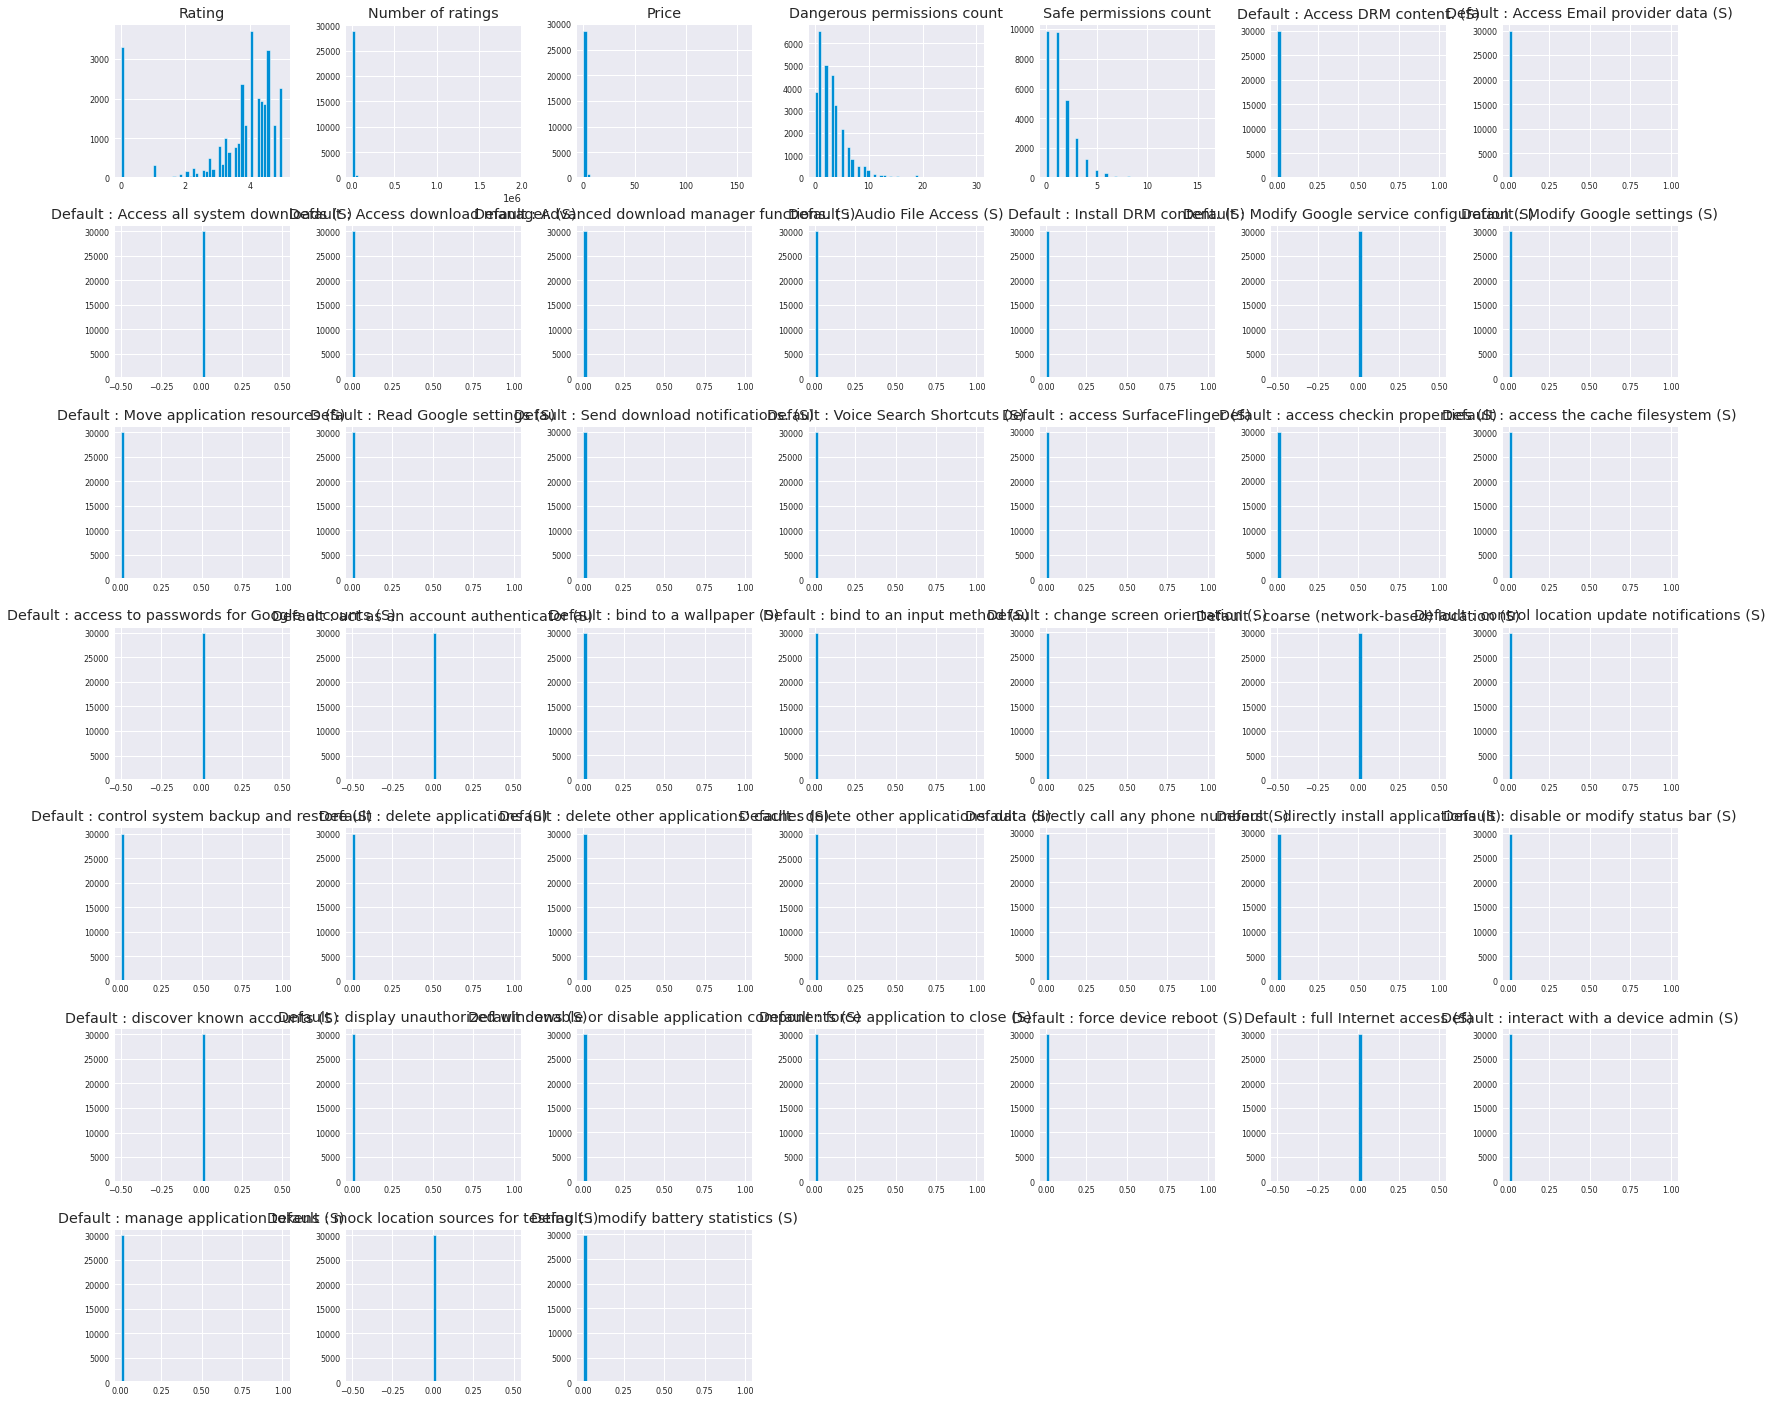

In [29]:
A.hist(figsize=(25,25), bins=50, xlabelsize=8, ylabelsize=8);

#### **3.3) Relation between Features**

**3.3.1) The correlation between the continuos variables**

- a) Pearson Correlation

- b) Spearman Correlation

- c) kendall

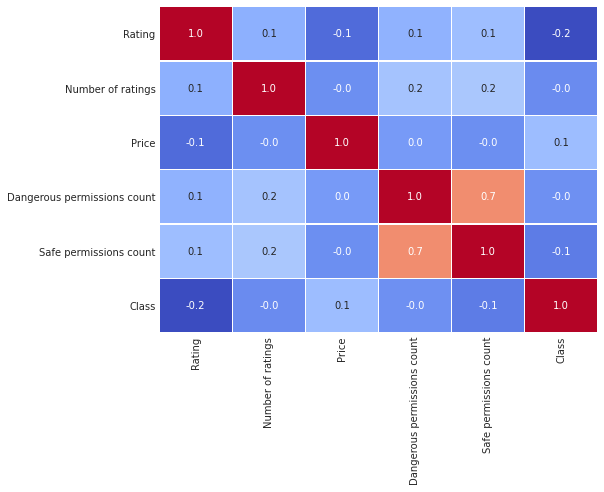

In [30]:
# Pearson Correlation
plt.figure(figsize=(7,6))
sns.heatmap(Correlation.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

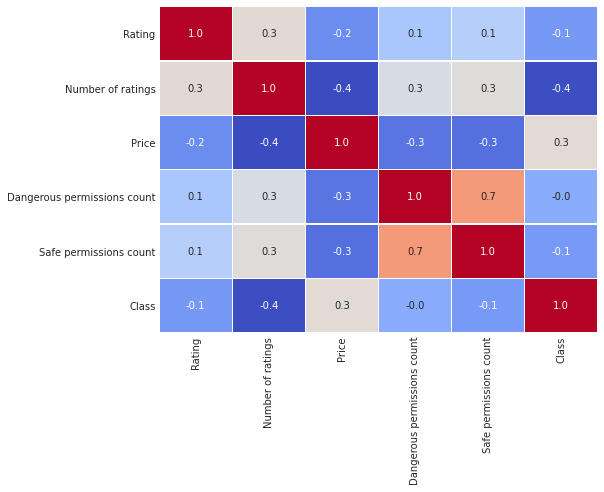

In [31]:
# Spearman Correlation
plt.figure(figsize=(7,6))
sns.heatmap(Correlation.corr(method='spearman'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

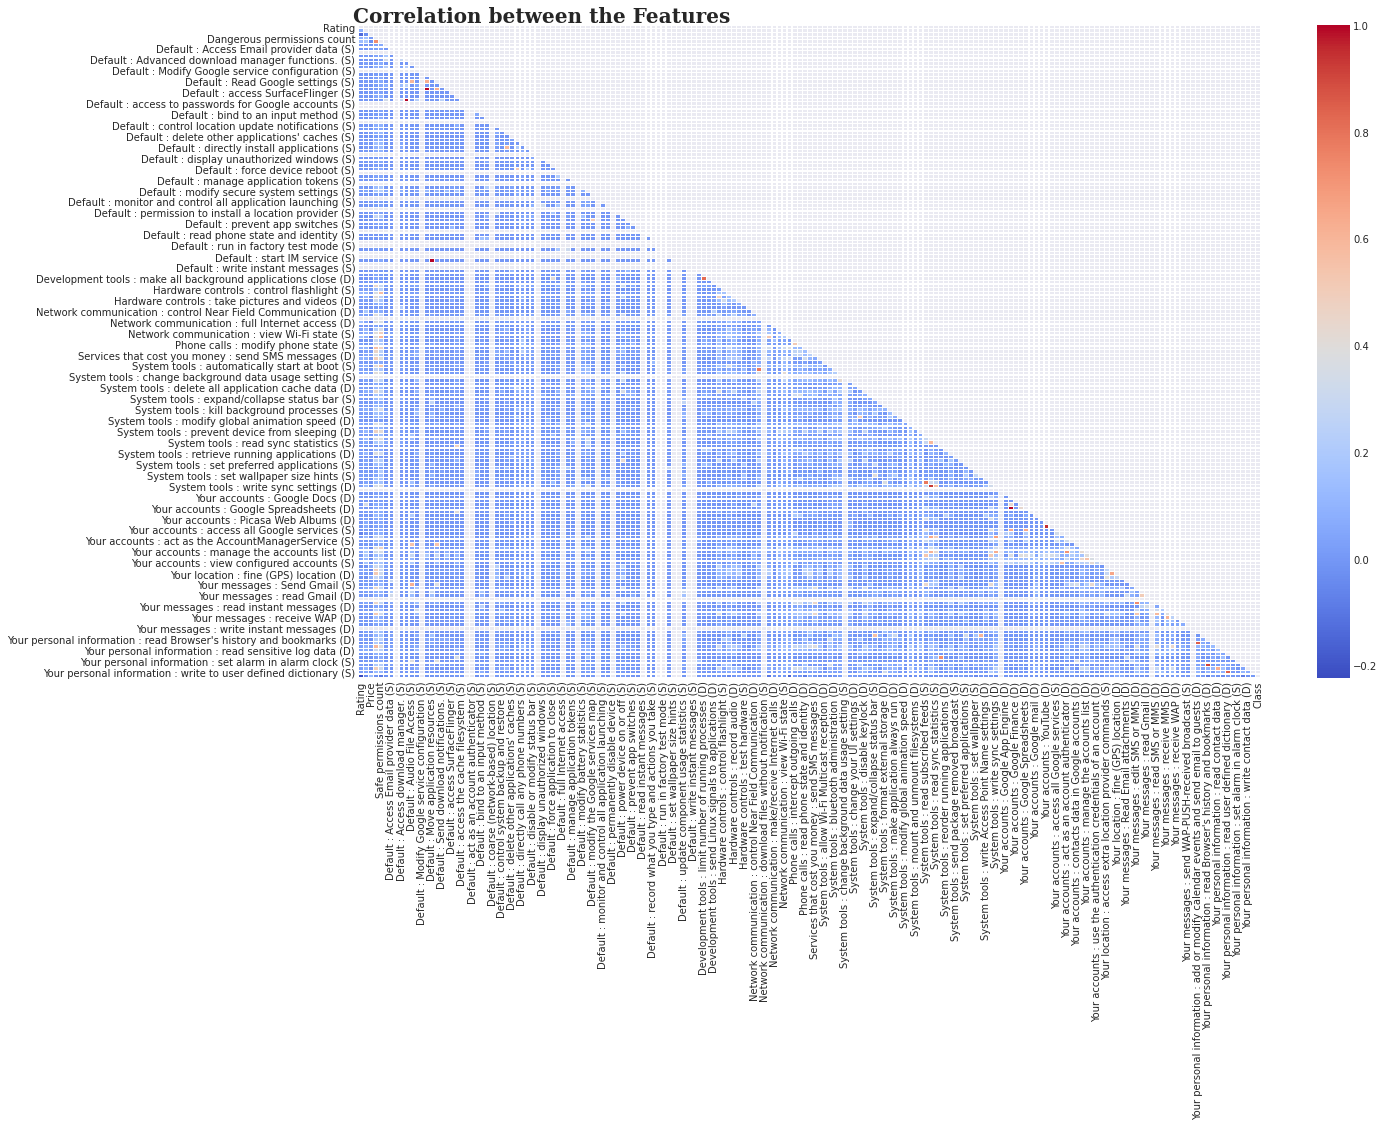

In [32]:
fig, ax = plt.subplots(figsize=(18, 12))
corr = Android.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax.text(-1.1, -0.7, 'Correlation between the Features', fontsize=20, fontweight='bold', fontfamily='serif')
sns.heatmap(corr, mask=mask, annot=False, fmt='.2f', linewidth=0.2, cbar=True, cmap='coolwarm');

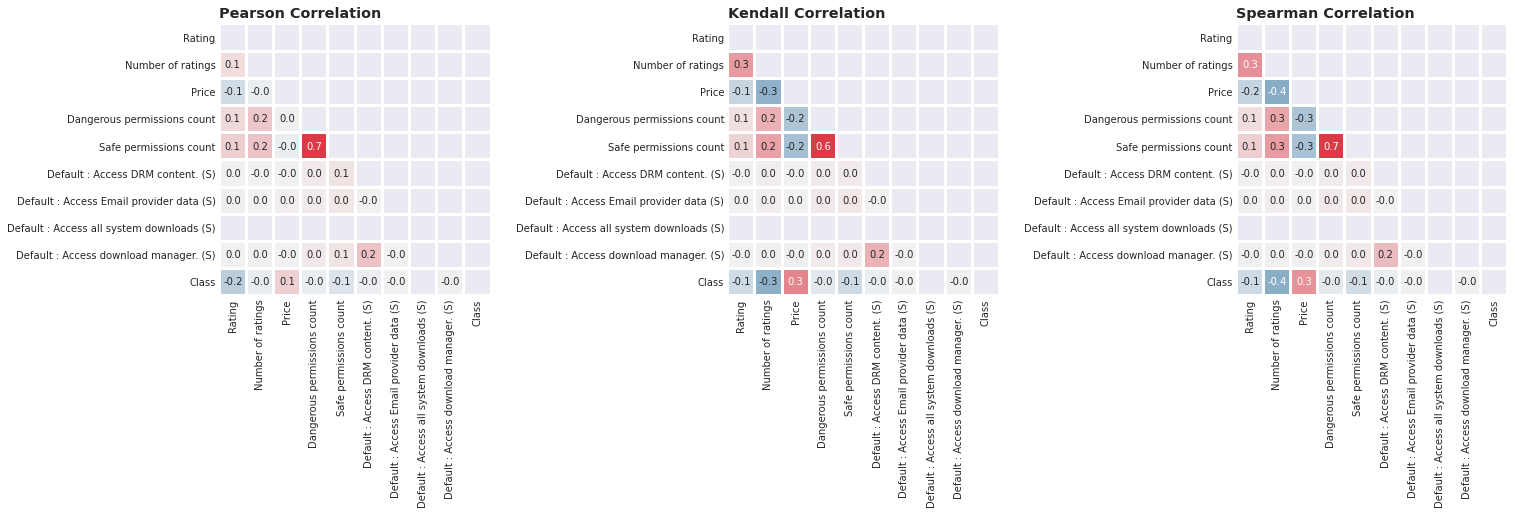

In [33]:
# kendall
fig, ax = plt.subplots(1, 3, figsize=(23 , 5))

feature_lst = ['Rating', 'Number of ratings', 'Price','Dangerous permissions count','Safe permissions count', 'Default : Access DRM content. (S)',
               'Default : Access Email provider data (S)', 'Default : Access all system downloads (S)', 'Default : Access download manager. (S)', 'Class']

corr = Android[feature_lst].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(Android[feature_lst].corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.1f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     

plt.show()

In [34]:
df_num_corr = df_num.corr()['Class'][:-1]
feature_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Class:\n{}".format(len(feature_list), feature_list))

There are 0 strongly correlated values with Class:
Series([], Name: Class, dtype: float64)


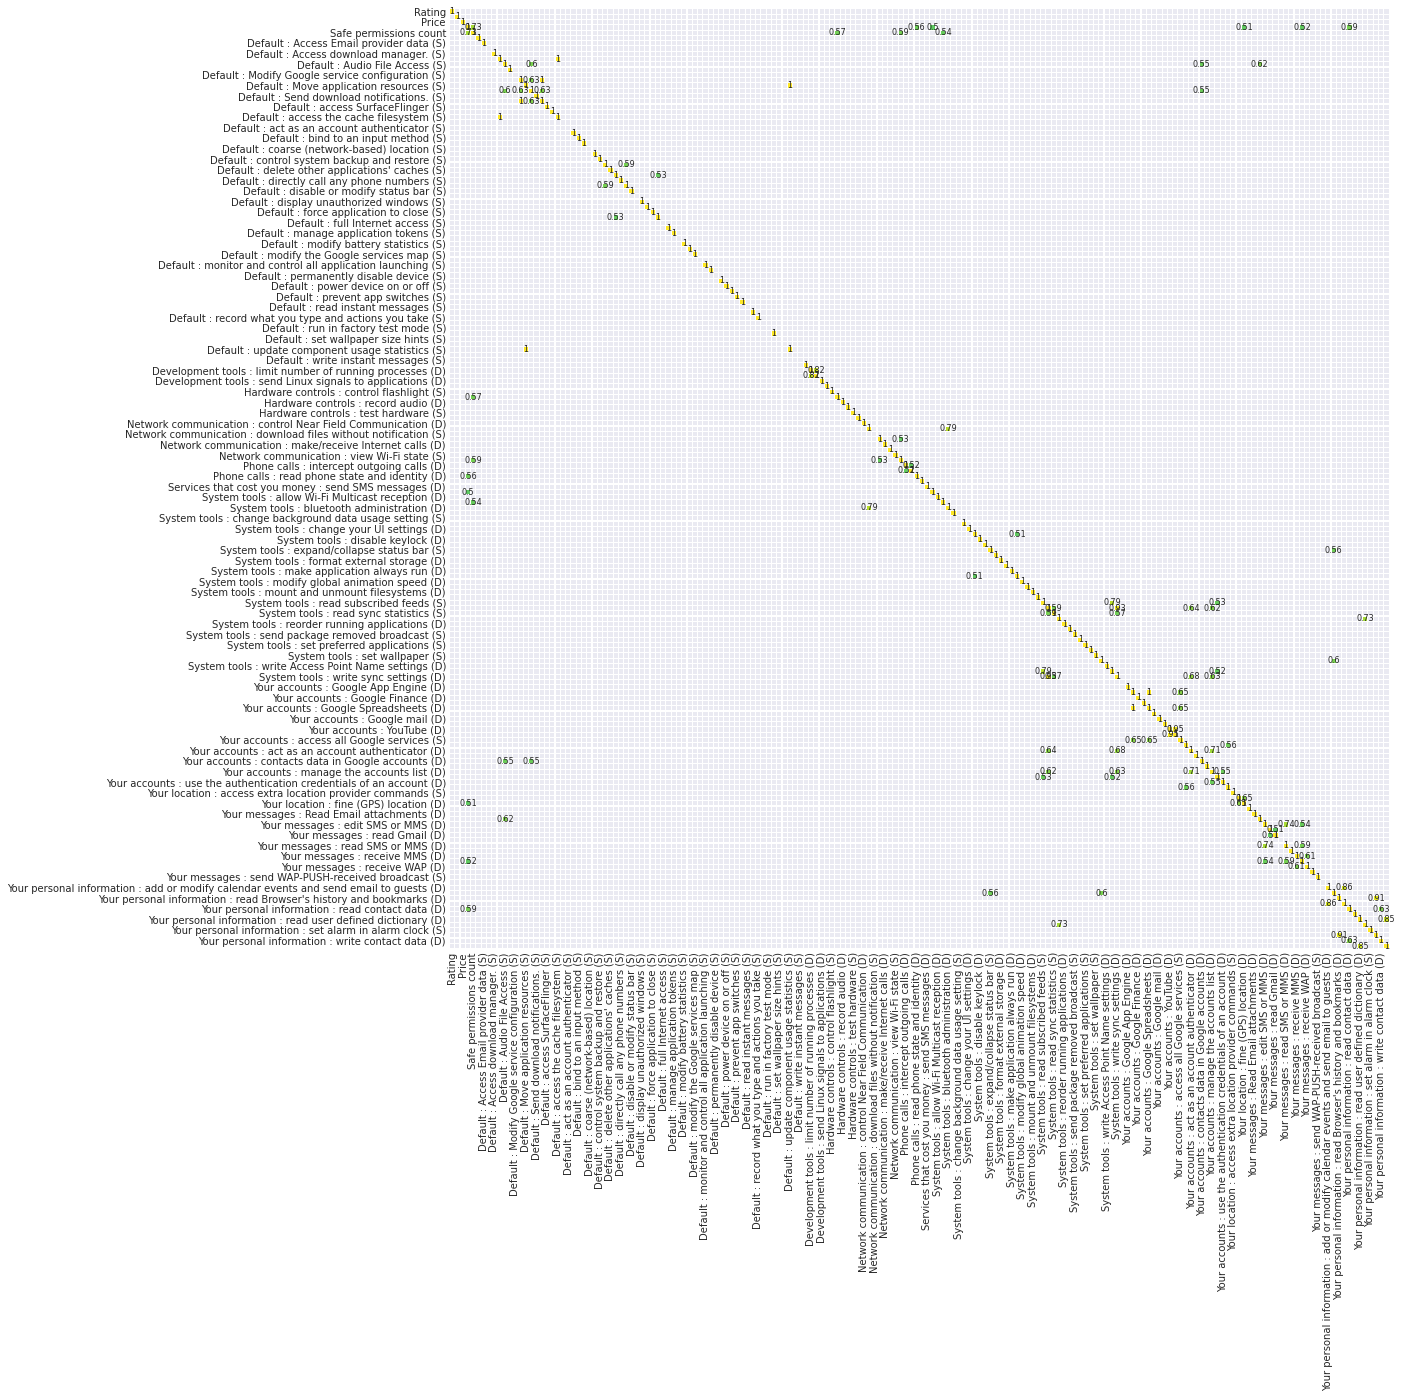

In [35]:
plt.figure(figsize=(15,30))
corr = df_num.drop('Class', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', cbar=False, vmax=1, vmin=-1, linewidths=0.1, annot=True, annot_kws={'size': 8}, square=True);

#### **3.3.2) The correlation between this continuos features and the target**

In [36]:
# FEATURE IMPORTANCE CORRELATION
# determine 20 most correlated features

df_corr_Android = Android.corr()['Class'].sort_values(ascending=False).head(20)
top_corr_features = df_corr_Android.index
top_corr_features

Index(['Class', 'Price', 'Your location : fine (GPS) location (D)',
       'Your location : mock location sources for testing (D)',
       'Services that cost you money : directly call phone numbers (D)',
       'Your location : access extra location provider commands (S)',
       'System tools : send sticky broadcast (S)',
       'Hardware controls : take pictures and videos (D)',
       'Your personal information : read calendar events (D)',
       'Your personal information : add or modify calendar events and send email to guests (D)',
       'Default : delete applications (S)',
       'Default : power device on or off (S)',
       'Your accounts : access other Google services (D)',
       'System tools : change your UI settings (D)',
       'System tools : change network connectivity (D)',
       'System tools : change Wi-Fi state (D)',
       'Your location : coarse (network-based) location (D)',
       'Default : directly install applications (S)',
       'Your messages : receive

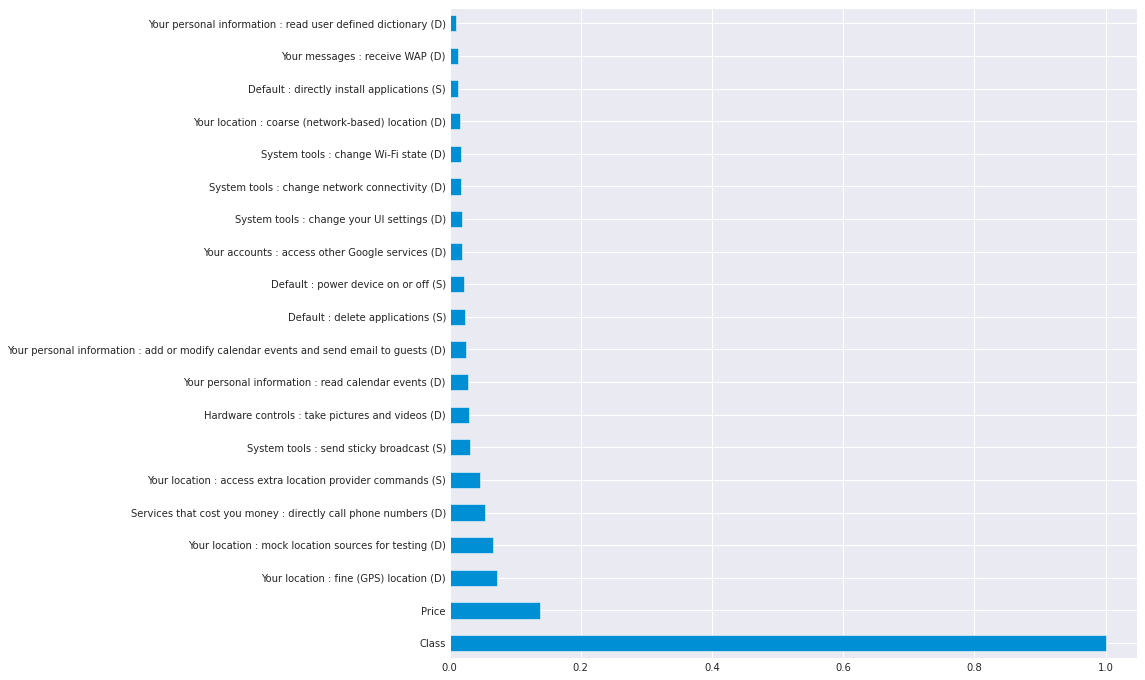

In [37]:
# plot top 20 most correlated features to our target (Class)
plt.figure(figsize=(11,12))
df_corr_Android.plot(kind='barh')
plt.show()

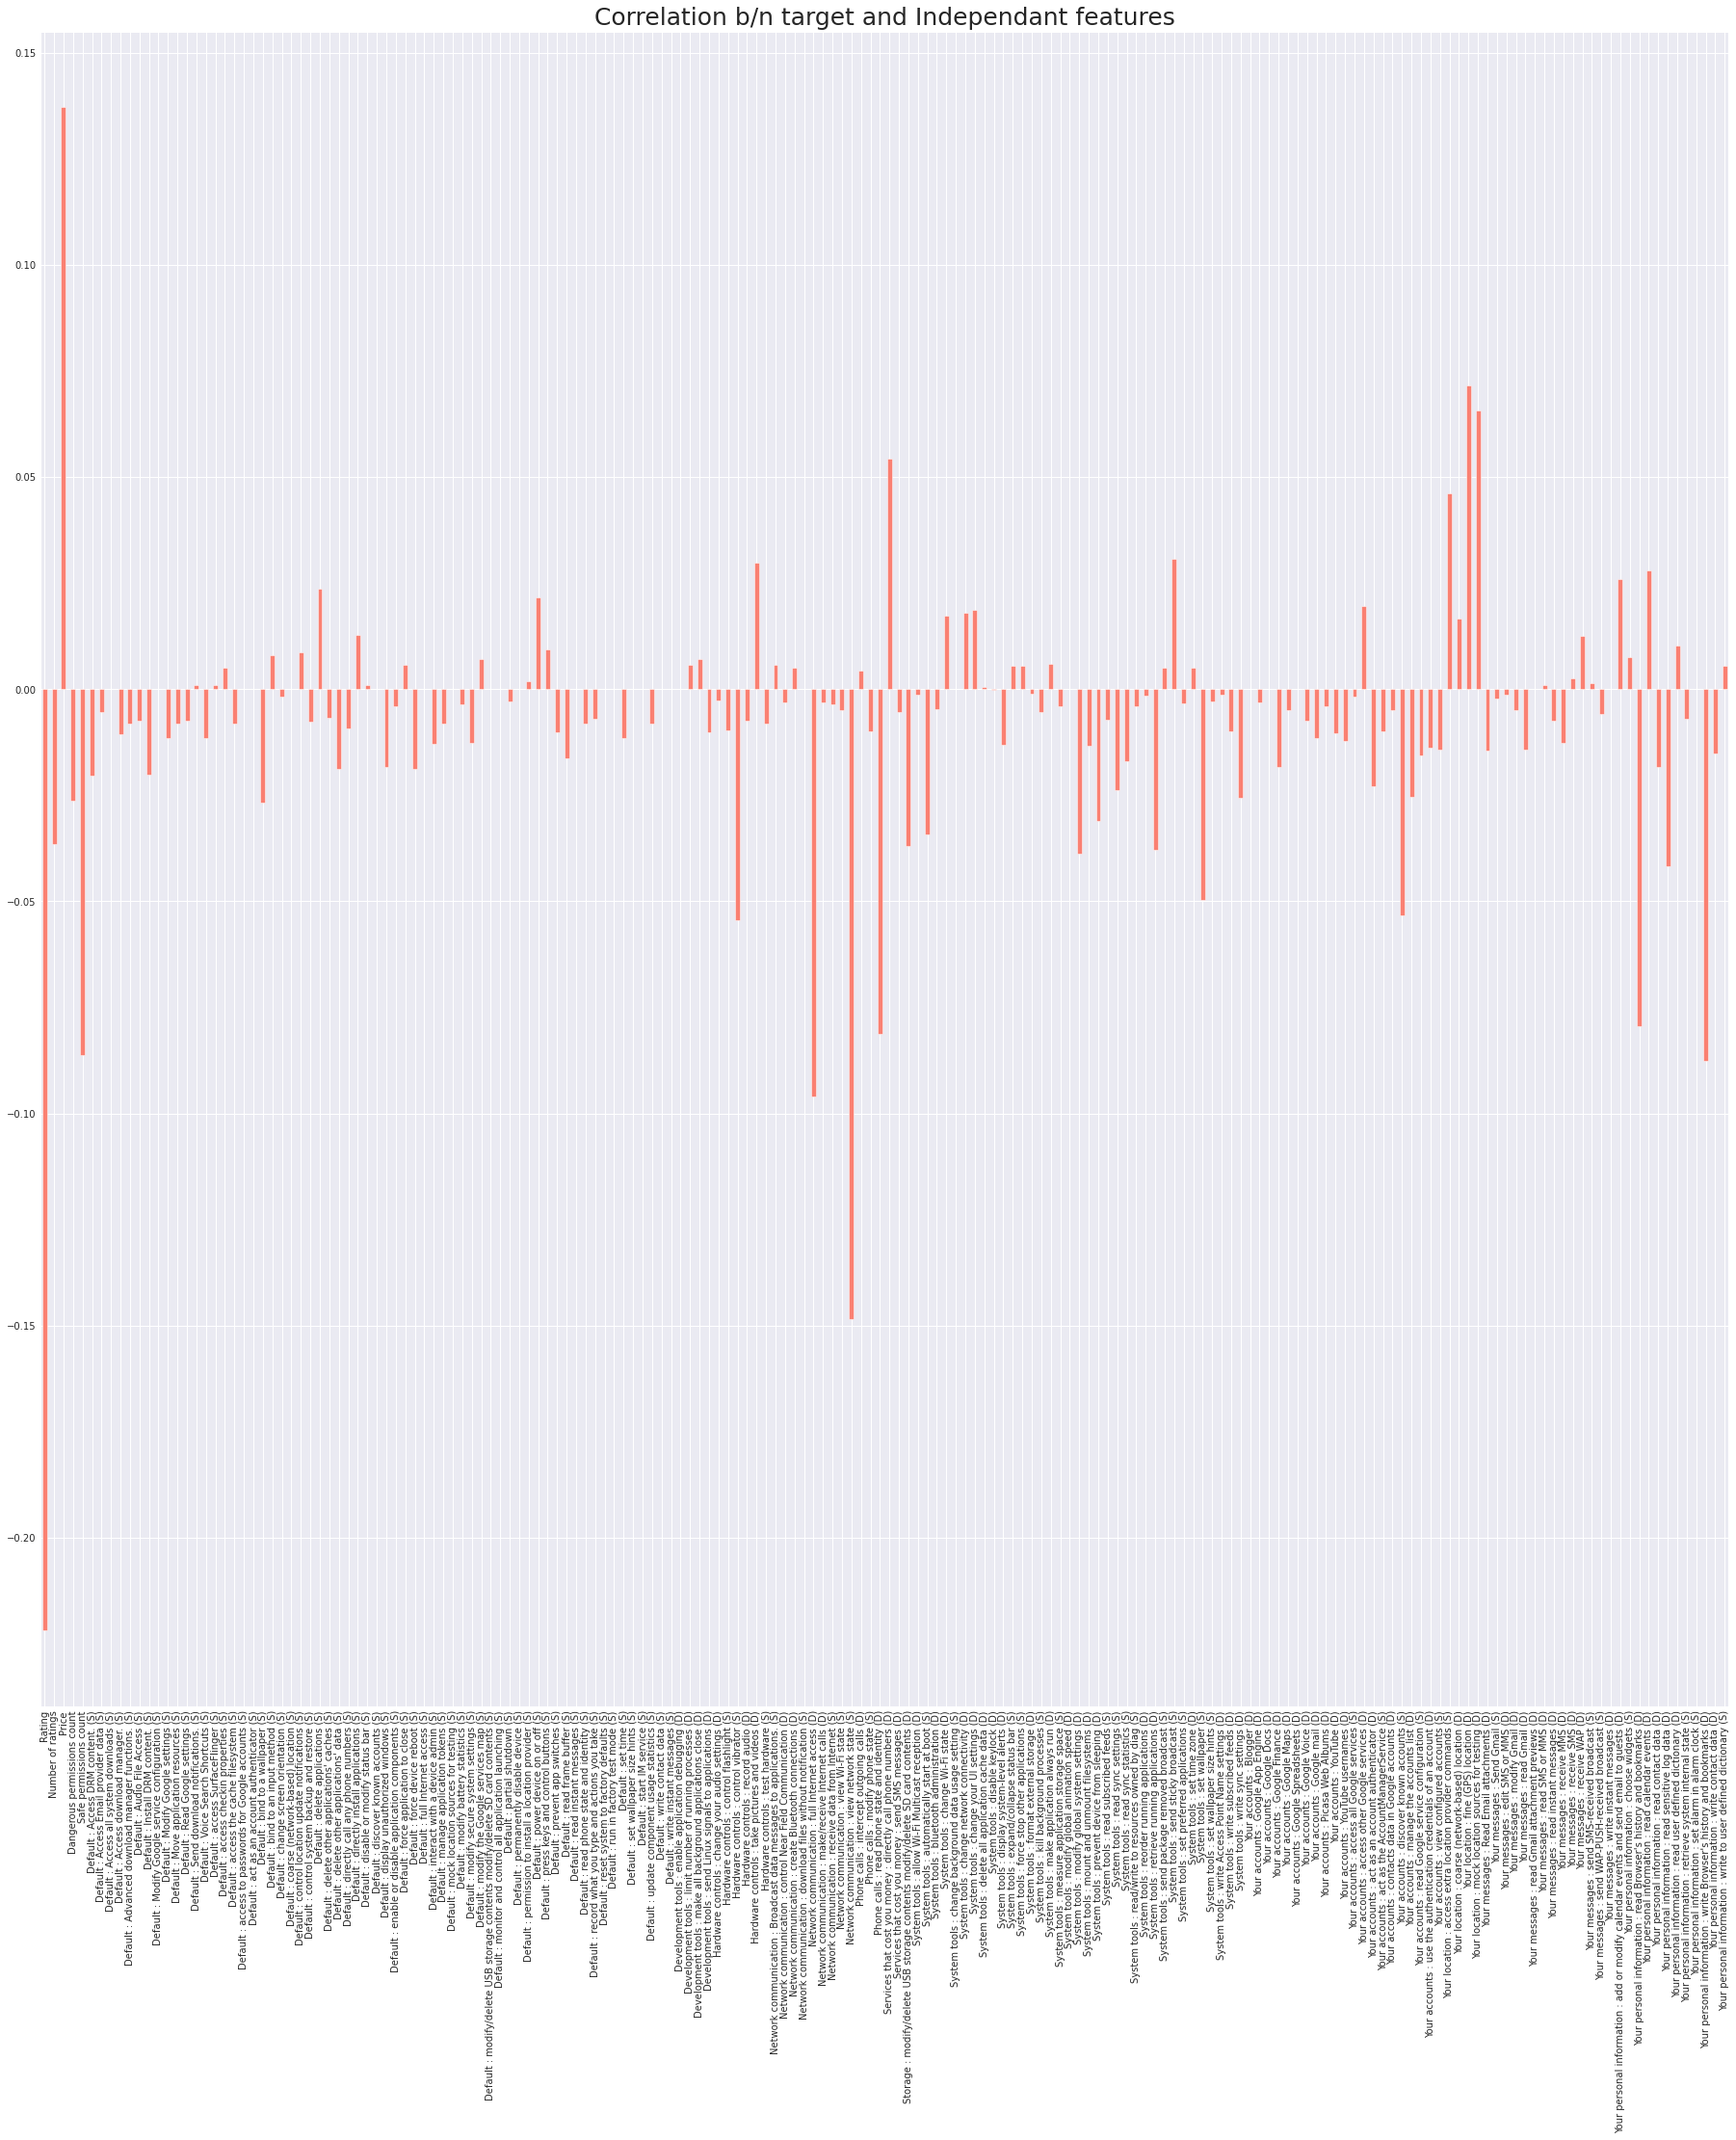

In [38]:
a = Android.drop(['Class'], axis=1)
a.corrwith(Android['Class']).plot(kind='bar', figsize=(28,32), color=['salmon'])
plt.title('Correlation b/n target and Independant features', size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

##### **3.4) Missing Values**

In [87]:
sum(Android['Price'] == 0)

24322

In [39]:
# Listing Number of missing values by feature column wise
total = Android.isnull().sum().sort_values(ascending=False)
total = total[total > 0]
total

Related apps                   755
Dangerous permissions count    204
Description                      3
App                              1
dtype: int64

In [40]:
Android.isnull().sum().sum()

963

In [41]:
percentage = round(total/len(Android)*100, 2)[round(total/len(Android)*100, 2) != 0]
pd.concat([total, percentage], axis=1, keys=['Total','Percentage'])

,Total,Percentage
Related apps,755,2.52
Dangerous permissions count,204,0.68
Description,3,0.01
App,1,NaN


In [42]:
Android['Related apps'] = Android['Related apps'].fillna(Android['Related apps'].mode()[0])

Android['Dangerous permissions count'] = Android['Dangerous permissions count'].fillna(Android['Dangerous permissions count'].median())

Android['Description'] = Android['Description'].fillna(Android['Description'].mode()[0])

Android['App'] = Android['App'].fillna(Android['App'].mode()[0])

In [43]:
Android.isnull().sum().sum()

0